In [15]:
import datetime as dt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
tickers = ["AAPL", "AMZN", "MSFT", "META", "GOOG", "TSLA", "JNJ", "JPM", "V"]
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

In [34]:
# Loop over tickers and create a DataFrame with close prices
for ticker in tickers:
    try:
        cl_price[ticker] = yf.download(ticker, start, end)["Adj Close"]
    except Exception as e:
        print(f"Failed to download data for {ticker}: {e}")

# Drop NaN values
cl_price.dropna(axis=0, how='any', inplace=True)

# Return calculation
daily_return = cl_price.pct_change()  # Creates DataFrame with daily return for each stock

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


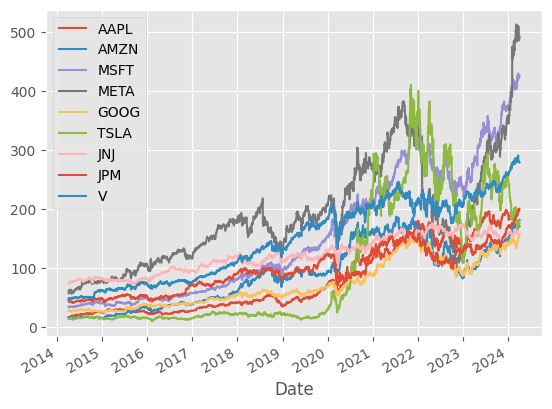

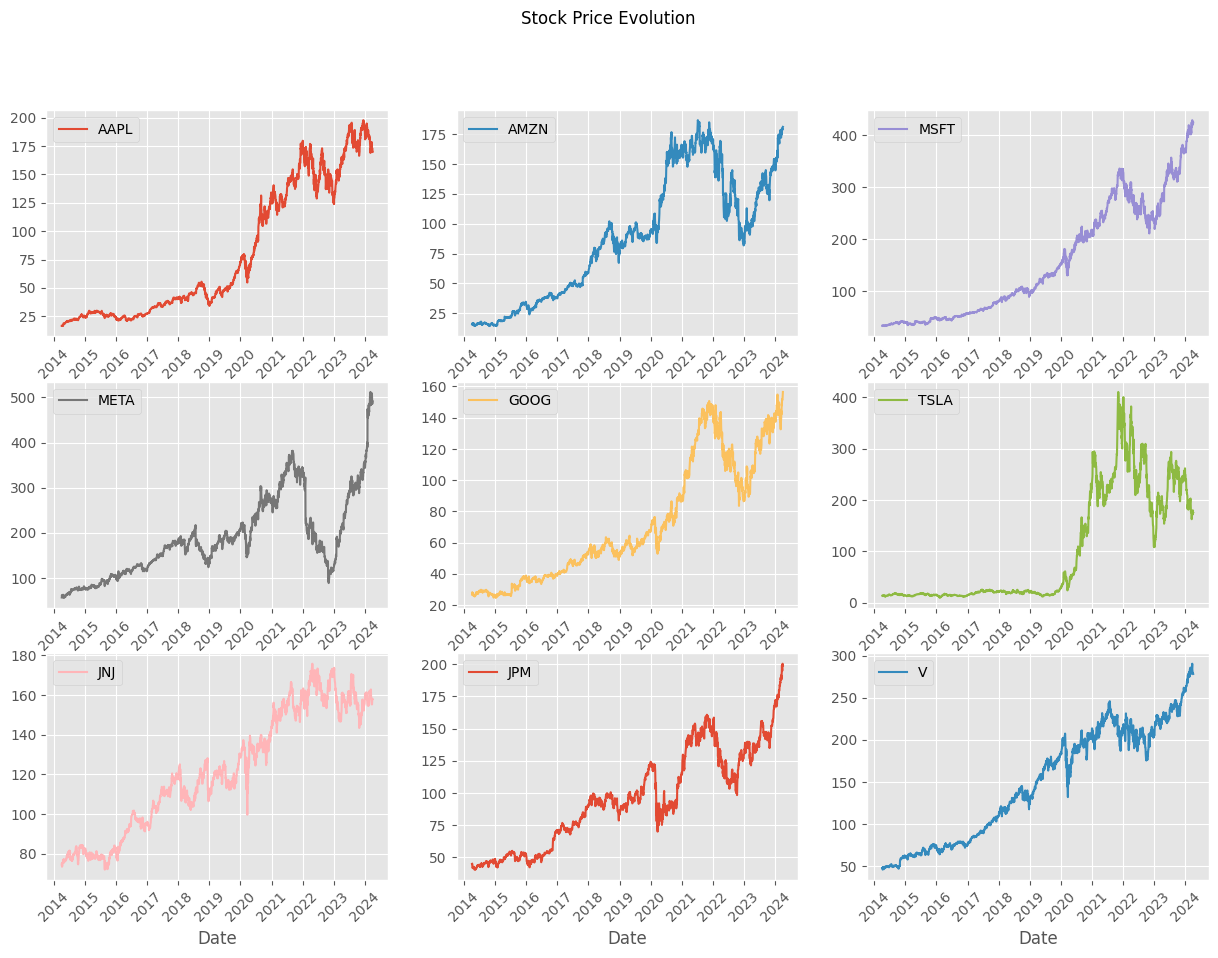

In [46]:
#plotting close prices
cl_price.plot() 

# Plot the DataFrame
ax = cl_price.plot(subplots=True, layout=(3, 3), title="Stock Price Evolution", grid=True, figsize=(15, 10), sharex=False)

# Rotate x-axis labels
for axis in ax.flatten():
    plt.sca(axis)
    plt.xticks(rotation=45)

plt.show()

<Axes: title={'center': 'Stock Price Evolution'}, xlabel='Date'>

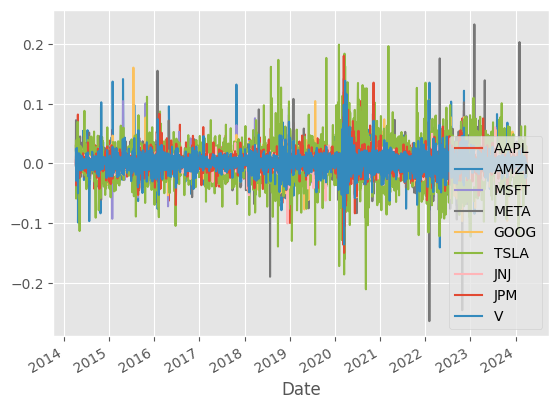

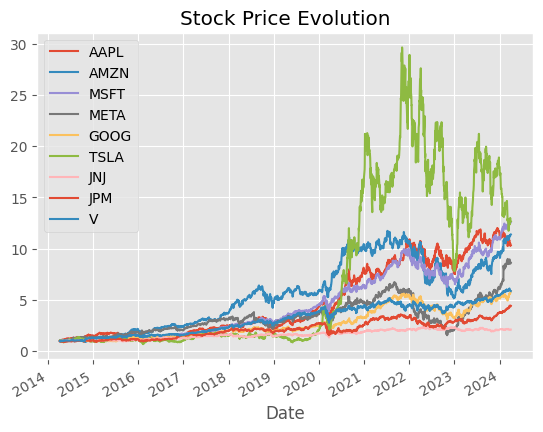

In [43]:
#plotting daily returns and cumulative returns    
daily_return.plot()
(1+daily_return).cumprod().plot(title = "Stock Price Evolution", grid =True)   

<BarContainer object of 10 artists>

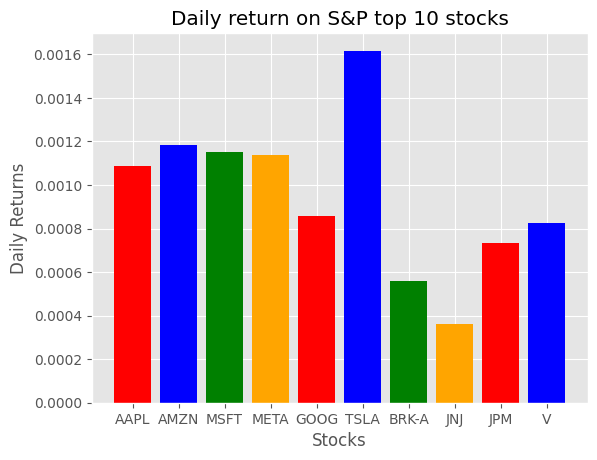

In [27]:
# Pyplot demo
fig, ax = plt.subplots()
plt.style.available
plt.style.use('ggplot')
ax.set(title="Daily return on S&P top 10 stocks", xlabel="Stocks", ylabel = "Daily Returns")
plt.bar(daily_return.columns,daily_return.mean(),color=["red","blue","green","orange"])